In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import tarfile

In [2]:
##### Part A #####

In [3]:
img = mpimg.imread(r'C:\Users\IKG\Desktop\IE 582\hw1_task2_kg.jpg') # Reading image as a variable
# The imread() function is used to read image data in an ndarray object.
# I added the image into submission, as well. By updating the directory it can be ran.

In [4]:
#print(img) # To the see structure of the variable that stores the image

In [5]:
type(img) # The structure of the variable that stores the image

numpy.ndarray

In [6]:
print(img.shape) # The dimension of the variable that stores the image (height, width, depth)
# Colour images have three-dimensional volumes, which are a height in pixels, a width in pixels, and a depth of 3 channels(RGB)
# I thought like: height:Row width:Column in upcoming parts

(512, 512, 3)


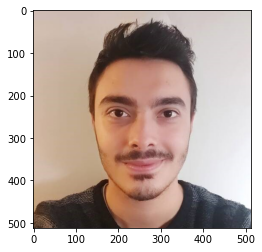

In [7]:
plt.imshow(img) # Displaying the image

In [8]:
##### Part B #####

In [9]:
# Obtaining each channel as a separate image variable.(There are 3 channels)
img_ch1 = img[:,:,0] 
img_ch2 = img[:,:,1]
img_ch3 = img[:,:,2]

In [10]:
img_ch1 # 1st channel

array([[207, 207, 207, ..., 213, 213, 213],
       [207, 207, 207, ..., 213, 213, 213],
       [207, 207, 207, ..., 213, 213, 213],
       ...,
       [ 56,  69,  82, ...,  91,  77,  71],
       [ 59,  68,  76, ...,  83,  70,  68],
       [100,  98,  91, ...,  76,  61,  60]], dtype=uint8)

In [11]:
img_ch2 # 2nd channel

array([[188, 188, 188, ..., 207, 207, 207],
       [188, 188, 188, ..., 207, 207, 207],
       [188, 188, 188, ..., 208, 208, 208],
       ...,
       [ 33,  46,  59, ...,  99,  85,  79],
       [ 36,  45,  53, ...,  90,  77,  75],
       [ 77,  75,  68, ...,  83,  68,  67]], dtype=uint8)

In [12]:
img_ch3 # 3rd channel

array([[182, 182, 182, ..., 207, 207, 207],
       [182, 182, 182, ..., 207, 207, 207],
       [181, 181, 181, ..., 205, 205, 205],
       ...,
       [ 17,  30,  43, ..., 112,  98,  92],
       [ 20,  29,  37, ..., 106,  93,  91],
       [ 61,  59,  52, ...,  99,  84,  83]], dtype=uint8)

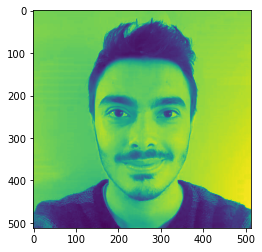

In [13]:
plt.imshow(img_ch1) # Displaying the 1st Channel

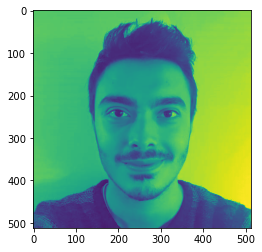

In [14]:
plt.imshow(img_ch2) # Displaying the 2nd Channel

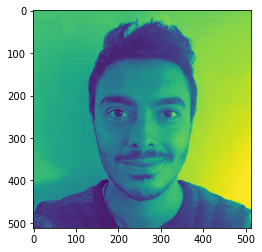

In [15]:
plt.imshow(img_ch3) # Displaying the 3rd Channel

In [16]:
##### Part C #####

In [17]:
# Checked dimensions of each channel
print(img_ch1.shape,img_ch2.shape,img_ch3.shape)

(512, 512) (512, 512) (512, 512)


In [18]:
# Converted each channel into dataframe
img_ch1 = pd.DataFrame(img_ch1)
img_ch2 = pd.DataFrame(img_ch2)
img_ch3 = pd.DataFrame(img_ch3)

In [19]:
# Checked the 1st channel
#img_ch1

In [20]:
# Checked the 2nd channel
#img_ch2

In [21]:
# Checked the 3rd channel
#img_ch3

In [22]:
# Arranged indexes such that they start from 1 
for i in (img_ch1,img_ch2,img_ch3):
    i.index = i.index + 1
    i.columns = i.columns + 1
    i = i.sort_index()

In [23]:
# Checked the 1st channel again
#img_ch1

In [24]:
# Checked the 2nd channel again
#img_ch2

In [25]:
# Checked the 3rd channel again
#img_ch3

In [26]:
# Created new dataframes for each channel that will hold the average values of each column
img_ch1_avg=pd.DataFrame(index=range(1))
img_ch2_avg=pd.DataFrame(index=range(1))
img_ch3_avg=pd.DataFrame(index=range(1))

In [27]:
# Adding average columns that hold the average value of each column for each channel
for j in (list(range(0,512))):
            img_ch1_avg['column'+str(j+1)+'avg'] = sum(img_ch1.iloc[:,j])/len(img_ch1.iloc[:,j])
            img_ch2_avg['column'+str(j+1)+'avg'] = sum(img_ch2.iloc[:,j])/len(img_ch2.iloc[:,j])
            img_ch3_avg['column'+str(j+1)+'avg'] = sum(img_ch3.iloc[:,j])/len(img_ch3.iloc[:,j])

In [28]:
# Checked the 1st channels' row vector that holds average value for each column
#img_ch1_avg

In [29]:
# Checked the 2nd channels' row vector that holds average value for each column
#img_ch2_avg

In [30]:
# Checked the 3rd channels' row vector that holds average value for each column
#img_ch3_avg

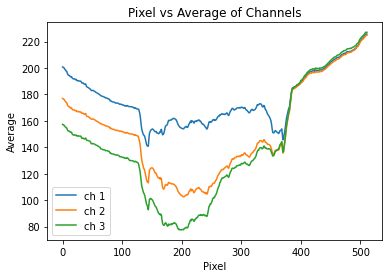

In [31]:
# Plotting a line plot for each channel on a single plot. 
plt.plot(list(range(0,512)), img_ch1_avg.iloc[0,:], label = "ch 1")
plt.plot(list(range(0,512)), img_ch2_avg.iloc[0,:], label = "ch 2")
plt.plot(list(range(0,512)), img_ch3_avg.iloc[0,:], label = "ch 3")
plt.title("Pixel vs Average of Channels")
plt.xlabel("Pixel")
plt.ylabel("Average")
plt.legend()
plt.show()

In [32]:
##### Part D #####

In [33]:
# Obtaining the half of the original image
img_half = img[0:512,0:256]

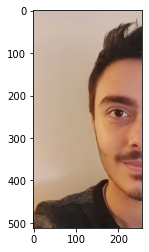

In [34]:
plt.imshow(img_half) # Displaying half of the original image

In [35]:
# Obtaining the half of the each channels'image separately
img_ch1_half = img_ch1.iloc[0:512,0:256]
img_ch2_half = img_ch2.iloc[0:512,0:256]
img_ch3_half = img_ch3.iloc[0:512,0:256]

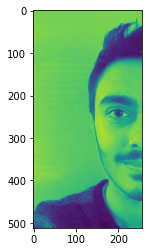

In [36]:
plt.imshow(img_ch1_half) # Displaying the new image of 1st Channel

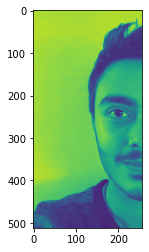

In [37]:
plt.imshow(img_ch2_half) # Displaying the new image of 2nd Channel

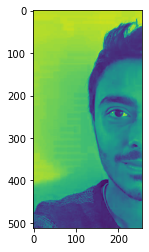

In [38]:
plt.imshow(img_ch3_half) # Displaying the new image of 3rd Channel

In [39]:
##### Part E #####

In [40]:
# The function that creates noisy image for the original image
def noisy(image):
    h,w,ch = image.shape
    uniform = np.random.uniform(0,0.1*(np.max(image)),(h,w,ch))
    noisy = image + uniform
    return noisy

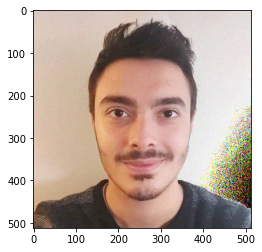

In [41]:
img_noisy=noisy(img)
plt.imshow(img_noisy.astype(np.uint8)) # Displaying the noisy image of the original one

In [42]:
# The function that creates noisy image for the channel images
def noisy_ch(image):
    h,w = image.shape
    uniform = np.random.uniform(0,0.1*(np.max(image)),(h,w))
    noisy = image + uniform
    return noisy

In [43]:
img_ch1_noisy=noisy_ch(img_ch1)
img_ch2_noisy=noisy_ch(img_ch2)
img_ch3_noisy=noisy_ch(img_ch3)

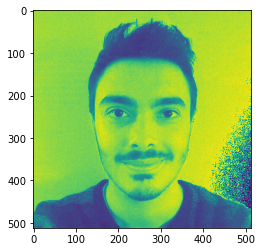

In [44]:
plt.imshow(img_ch1_noisy.astype(np.uint8)) # Displaying the noisy image of 1st channel

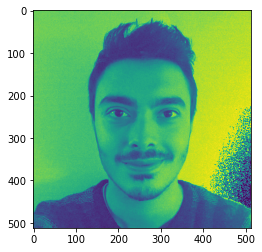

In [45]:
plt.imshow(img_ch2_noisy.astype(np.uint8)) # Displaying the noisy image of 2nd channel

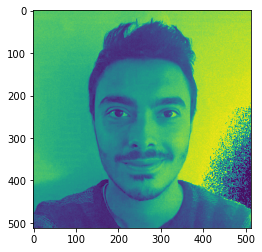

In [46]:
plt.imshow(img_ch3_noisy.astype(np.uint8)) # Displaying the noisy image of 3rd channel

In [47]:
import os

In [48]:
os.system('jupyter nbconvert --to html HW1_Task2_Final.ipynb')

0